In [1]:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000
import networkx as nx
import pandas as pd
import urllib
import numpy as np
import matplotlib.pyplot as plt 
import sys
import os



url = "https://raw.githubusercontent.com/Misterresearch/CUNY-Projects/master/tveanon_ip_guid.csv"
tvsubs = pd.read_csv(url, parse_dates=True, names=['IP','ID'], header=0)
print tvsubs

                  IP                                      ID
0      1.242.166.174  {21E4cC33-C623-F514-CcC1-44D7E28811E3}
1        1.42.46.226        96659c2c0045cdc1c729d8a4269a268c
2      100.0.115.126        ca1dc06138cda889adcfd017a55acc06
3        100.0.122.4        06efc69f1e71087e96d01a6f22cf7f5a
4      100.0.184.148  {744FAC75-30E3-5033-1cc0-5C996cCCCcc4}
5      100.0.197.165        f1969f8e6cff0c77e848ef2a3cccecaf
6       100.0.197.89  {ccEF74A6-4C3F-0Ac5-0Ec5-1cE5419125EE}
7      100.0.198.144        34e60674e957ff1161757790d7052630
8      100.0.205.254        86759e59c2eadc199a39f3c42ee20542
9      100.0.215.107        2f7f26d1f1aacca737cc88ecfae37014
10     100.0.221.240        68c0c55e9cf8c7750d98c71c6da43207
11       100.0.48.54        cd135d6ad29f3438cc9e4dd2ed9754e1
12        100.0.6.24        59c45a9cc14cd22960439d030c1d8f1d
13      100.0.62.144        ade331c5c6d07ec47f9f39eeeae8e2cc
14     100.1.102.192        30c727f149c92c8545817c8019f0ed9a
15      100.1.107.47    

In [2]:
B = nx.Graph()
B.add_nodes_from(tvsubs['IP'], bipartite='IP')
B.add_nodes_from(tvsubs['ID'], bipartite='ID')
B.add_edges_from(zip(tvsubs['IP'], tvsubs['ID']))

B.nodes()
B.edges()
#nx.draw(B, node_size=0, node_color='w', edge_color='b', alpha=.2)
#plt.show()


In [ ]:
B2 = nx.Graph()                                                                                                                                     
B2edges = filter(lambda x: B.degree()[x[0]] > 2 and B.degree()[x[1]] > 2, B.edges())
B2.add_edges_from(B2edges)

In [19]:
#IP_nodes = [n for n in B.nodes() if B.node[n]
           #['bipartite'] == 'IP']

#ID_nodes = [n for n in B.nodes() if B.node[n]
           #['bipartite'] == 'ID']

#projectedIP = nx.bipartite.projected_graph(B, nodes=IP_nodes)
#projectedID = nx.bipartite.projected_graph(B, nodes=ID_nodes)

B2=nx.Graph()
def trim_edges(B, weight=2):
    for i, to, edata in B.edges(data=True):
                if edata['weight'] > weight:
                        B2.add_edge(i,to,edata)
    return B2
B2 = trim_edges(B, 2)
B2.nodes()
#nx.draw(B2, node_size=0, node_color='w', edge_color='b', alpha=.2)
#plt.show()

KeyError: 'weight'

In [75]:
def island_method(B, iterations=5):
    weights= [edata['weight'] for f,to,edata in B.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(B, threshold)] for threshold in range(mn,mx,step)]

In [76]:
cc=nx.connected_component_subgraphs(B)
islands=island_method(cc)
for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print i[0], len(i[1]), len(net.connected_component_subgraphs(i[1]))

AttributeError: 'generator' object has no attribute 'edges'

In [ ]:
pos = {node:[0, i] for i,node in enumerate(tvsubs['ID'])}
pos.update({node:[1, i] for i,node in enumerate(tvsubs['IP'])})
nx.draw(B, pos, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.25

/Users/digitalmarketer1977/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/digitalmarketer1977/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/digitalmarketer1977/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/digitalmarketer1977/anaconda/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated,

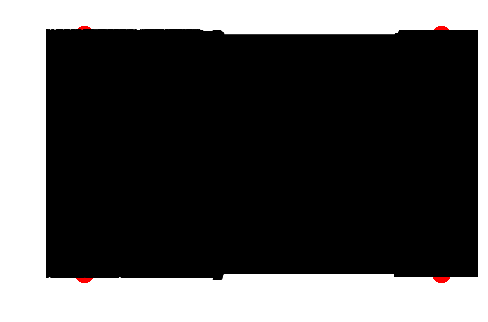

In [21]:
nx.draw_networkx_labels(B, pos)

plt.show()